## Simulating Real-Time Stock Price Data Fetching and Computing

In this section of our notebook, we simulate the process of fetching and computing real-time stock price data. The task involves interfacing with a stock price data feed, which in real-world scenarios would involve connecting to a financial data API. However, for demonstration purposes, we will generate random bid and ask prices and then compute their average to represent the stock price. This is akin to the modifications suggested in Task 1 where you adjust the computation of stock prices based on bid and ask values. The computed average price provides a more realistic representation of the market price than just using the bid or ask alone.

### Step 1: Fetching and Computing Stock Prices

In this step, we'll simulate fetching stock prices and computing the average prices based on the bid and ask values, as described in Task 1. We'll create a function to simulate receiving stock data, which normally you'd get from a real-time data feed. For this example, we'll generate random stock prices to mimic real-time data. Then, we'll compute the average price using the formula (bid_price + ask_price) / 2.

#### This example of the code has

A function to simulate fetching stock data with random bid and ask prices.

A function to compute the average stock price from bid and ask.

A simple loop to fetch and compute prices repeatedly to simulate real-time data fetching.

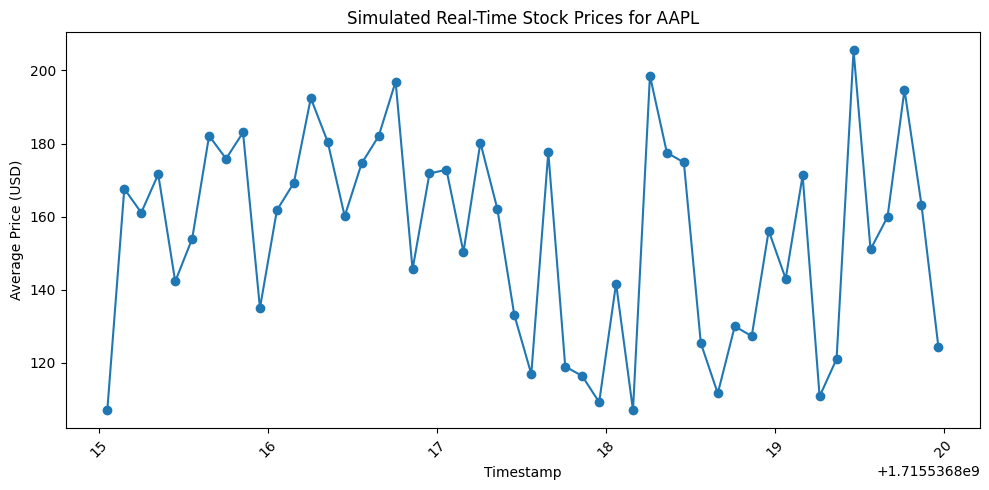

In [1]:
import random
import matplotlib.pyplot as plt
import time

# Function to simulate fetching stock data
def fetch_stock_data(stock_name):
    bid_price = random.uniform(100, 200)
    ask_price = random.uniform(bid_price, bid_price + 20)  # ask price is always higher than bid
    return stock_name, bid_price, ask_price

# Function to compute the average price from bid and ask
def compute_average_price(bid_price, ask_price):
    return (bid_price + ask_price) / 2

# Main simulation loop
stock_prices = []
timestamps = []
for _ in range(50):  # Simulating 50 data points
    stock_name, bid, ask = fetch_stock_data("AAPL")
    average_price = compute_average_price(bid, ask)
    stock_prices.append(average_price)
    timestamps.append(time.time())
    time.sleep(0.1)  # Pause slightly to mimic real-time fetching

# Plotting the stock prices
plt.figure(figsize=(10, 5))
plt.plot(timestamps, stock_prices, marker='o')
plt.title("Simulated Real-Time Stock Prices for AAPL")
plt.xlabel("Timestamp")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 2: Real-time Graphing of Stock Prices


Implement a real-time graph to display stock prices dynamically. This simulation will mimic fetching stock prices from a live data feed, plotting these prices in real time on a graph. The graph will automatically update at regular intervals with new data, providing a continuous view of the stock price trends.

#### This example of the code 

We will use matplotlib for plotting and FuncAnimation for updating the graph in real-time. We'll simulate data fetching within the update function to ensure the graph remains responsive and accurately represents changes over time.

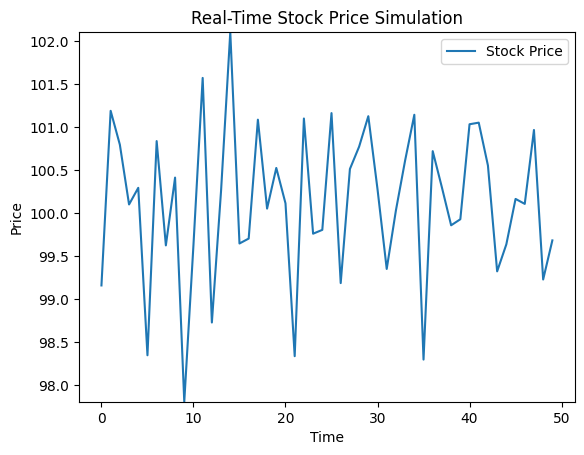

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate some initial random stock prices and setup the figure
prices = [np.random.normal(100, 1) for _ in range(50)]
fig, ax = plt.subplots()
line, = ax.plot(prices, label='Stock Price')

def update(frame):
    # Simulate incoming new price
    new_price = np.random.normal(100, 1)
    prices.append(new_price)
    prices.pop(0)  # Remove the oldest price to keep the graph length constant
    line.set_ydata(prices)
    ax.set_ylim(min(prices), max(prices))
    return line,

ani = FuncAnimation(fig, update, frames=100, blit=True)
ax.set_title('Real-Time Stock Price Simulation')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
plt.legend()
plt.show()


### Task 3: Stock Ratio Tracking with Dynamic Bounds


Extend the real-time graphing functionality from Task 2 to include the ratio between two stocks, plotting this ratio alongside dynamic upper and lower bounds. This setup is useful for traders monitoring the ratio for deviations that may indicate trading opportunities.

#### This example of the code 

The code will dynamically calculate and plot the ratio of two stock prices, along with bounds that adjust based on a rolling average of the ratio.



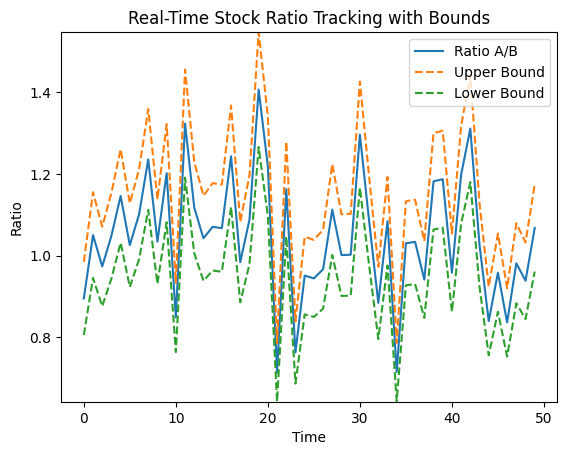

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Setup initial stock prices and ratio calculations
stock_a_prices = [np.random.normal(100, 10) for _ in range(50)]
stock_b_prices = [np.random.normal(95, 10) for _ in range(50)]
ratios = [a/b for a, b in zip(stock_a_prices, stock_b_prices)]
upper_bound = [r * 1.1 for r in ratios]
lower_bound = [r * 0.9 for r in ratios]

fig, ax = plt.subplots()
ratio_line, = ax.plot(ratios, label='Ratio A/B')
upper_line, = ax.plot(upper_bound, label='Upper Bound', linestyle='--')
lower_line, = ax.plot(lower_bound, label='Lower Bound', linestyle='--')

def update(frame):
    # Simulate new stock prices and calculate new ratio
    new_a = np.random.normal(100, 10)
    new_b = np.random.normal(95, 10)
    new_ratio = new_a / new_b
    stock_a_prices.append(new_a)
    stock_b_prices.append(new_b)
    ratios.append(new_ratio)
    upper_bound.append(new_ratio * 1.1)
    lower_bound.append(new_ratio * 0.9)

    # Update the graph
    stock_a_prices.pop(0)
    stock_b_prices.pop(0)
    ratios.pop(0)
    upper_bound.pop(0)
    lower_bound.pop(0)
    
    ratio_line.set_ydata(ratios)
    upper_line.set_ydata(upper_bound)
    lower_line.set_ydata(lower_bound)

    ax.set_ylim(min(lower_bound), max(upper_bound))
    return ratio_line, upper_line, lower_line

ani = FuncAnimation(fig, update, frames=100, blit=True)
ax.set_title('Real-Time Stock Ratio Tracking with Bounds')
ax.set_xlabel('Time')
ax.set_ylabel('Ratio')
plt.legend()
plt.show()
